# Book Recommendation System

## INDEX:
    
### - INTRODUCTION
The Book-Crossing dataset is a collection of ratings and reviews for over 270,000 books from the Book-Crossing community. The dataset includes information on each book's title, author, publication year, and publisher, as well as ratings and reviews from the community's members. The ratings range from 0 to 10, with higher ratings indicating that the reader enjoyed the book more. This dataset is used for building recommendation systems and studying user behavior and preferences in the context of book reading.

### - Import libraries

### - EDA (Exploratory data analysis)
    
    Load the dataset

    Check the number of rows and columns in each dataset

    Check for missing values

    Check outliers on 3 dataframes
    
    Checks for duplicates in all three dataframes 
    
    To check if books published after 2022
    
    check for book rating of books that were published after 2022
    
    Update the year of publication column with the correct information
    
    To check the results of the updated year of publications for the above list
    
    Check the structure and contents of the dataframe

    Display number of unique values in each column of the three dataframes

    Display data types of each column in the dataframes

### - Visualization

    Visualizing the distribution of missing values

    Distribution of book ratings

### - Reasearch questions on the dataset 
    
    Users who gave zero ratings

    Display the top 10 publishers and book authors who has most books with 0 ratings

    Most popular authors based on the number of books written

    Average rating by year of publication

    Top 10 most rated books

    Top 10 users who rated the most books

    Top 10 publishers based on number of books

    Who are the most popular authors in the dataset?

    What is the average rating of books written by a particular author?

    Is there a difference in ratings between fiction and non-fiction books?

    Is there a correlation between the publication year of a book and its average rating, and if so, how strong is this correlation?
    
### - Function-based programming technique

### - Collaborative filtering for book recommendater system

### - popularity based recommender system  

# CODE

## Import the necessary libraries

In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats

import missingno as msno


Bad key text.latex.preview in file C:\Users\divya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\divya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\divya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

# EDA- Exploratory data analysis

### Load the dataset

In [77]:
books = pd.read_csv('Books.csv')

users = pd.read_csv('Users.csv')

ratings = pd.read_csv('Ratings.csv')

C:\Users\divya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Check the number of rows and columns in each dataset

In [9]:
print("Books dataset shape:", books.shape)

print("Users dataset shape:", users.shape)

print("Ratings dataset shape:", ratings.shape)

Books dataset shape: (271360, 8)
Users dataset shape: (278858, 3)
Ratings dataset shape: (1149780, 3)


### Check for missing values

In [10]:
print("Books missing values:", books.isnull().sum())

print("Users missing values:", users.isnull().sum())

print("Ratings missing values:", ratings.isnull().sum())

Books missing values: ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Users missing values: User-ID          0
Location         0
Age         110762
dtype: int64
Ratings missing values: User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


There are very few missing values in the dataset, however Age column in Users dataframe has a significant amount of missing values but it can be ignored as age attribute would not be considered for the analysis.

### Check outliers on 3 dataframes

In [78]:
ratings_df = pd.read_csv('Ratings.csv', error_bad_lines=False)

z_scores = np.abs(stats.zscore(ratings_df['Book-Rating']))
outliers = ratings_df[(z_scores > 3)]

print("Number of outliers:", len(outliers))


C:\Users\divya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Number of outliers: 0


In [79]:
books_df =pd.read_csv('books.csv', error_bad_lines=False)
# Replace non-numeric values with NaN
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Drop NaN values
books_df.dropna(subset=['Year-Of-Publication'], inplace=True)

# Convert 'Year-Of-Publication' column to integers
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

# Calculate z-scores
z_scores = np.abs(stats.zscore(books_df['Year-Of-Publication']))

# Define threshold for outlier detection
threshold = 3

# Detect and remove outliers
books_df = books_df[(z_scores < threshold)]


print("Number of outliers:", len(outliers))

Number of outliers: 0


In [80]:
users_df = pd.read_csv('Users.csv', error_bad_lines=False)

# Remove users with invalid age (0)
users_df = users_df[users_df['Age'] != 0]

z_scores = np.abs(stats.zscore(users_df['Age']))
outliers = users_df[(z_scores > 3)]

print("Number of outliers:", len(outliers))


Number of outliers: 0


There are no outliers in the 3 dataframes!

Checking for outliers in a dataset can be important in order to understand the distribution of the data and identify any unusual values or extreme observations that may affect the analysis. 
Z-score is a measure of how many standard deviations a data point is from the mean.

The threshold for identifying an outlier is set as 3. If the absolute Z-score of a value is greater than 3, it is considered an outlier. The outliers are identified by comparing the Z-scores against the threshold, and the rows that contain outliers are stored in a new dataframe called 'outliers'.

### checks for duplicates in all three dataframes 

In [19]:
dataframes = [books_df, users_df, ratings_df]

for df_name, df in zip(['books_df', 'users_df', 'ratings_df'], dataframes):
    duplicate_rows = df[df.duplicated()]

    if duplicate_rows.empty:
        print(f"No duplicates found in {df_name}.")
    else:
        print(f"Duplicate rows found in {df_name}:")
        print(duplicate_rows)

No duplicates found in books_df.
No duplicates found in users_df.
No duplicates found in ratings_df.


### To check if books published after 2022

In [20]:
# Convert the 'Year-Of-Publication' column to numeric type
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Filter the books dataframe to include only the books published after 2022
filtered_books = books_df[books_df['Year-Of-Publication'] > 2022]

# Extract the year from the 'Year-Of-Publication' column
filtered_books['Year-Of-Publication'] = filtered_books['Year-Of-Publication'].apply(lambda x: str(x)[:4])

# Display the filtered books as a table
display(filtered_books)

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


Yeas of publication information is wrongly entered, rectifying it accordingly with the right information.

### check for book rating of books that were published after 2022

In [22]:
from tabulate import tabulate

# Filter the books dataframe to include only the books published after 2022
filtered_books = books_df[books_df['Year-Of-Publication'] > 2022]

# Merge the filtered books with the ratings dataframe on the ISBN column
merged_df = filtered_books.merge(ratings_df, on='ISBN')

# Drop duplicates based on Book-Title column
unique_ratings = merged_df[['Book-Title', 'Year-Of-Publication', 'Book-Rating']].drop_duplicates('Book-Title')

# Convert the dataframe to a table format
table = tabulate(unique_ratings, headers='keys', tablefmt='psql')

# Display the table
print(table)

+----+-------------------------------------------------------------------------------+-----------------------+---------------+
|    | Book-Title                                                                    |   Year-Of-Publication |   Book-Rating |
|----+-------------------------------------------------------------------------------+-----------------------+---------------|
|  0 | MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)                     |                  2030 |             0 |
| 13 | MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)                  |                  2030 |             0 |
| 23 | Crossing America                                                              |                  2030 |             7 |
| 27 | Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books) |                  2050 |            10 |
| 32 | Outline of European Architecture (Pelican S.)                                 |                  2050 | 

### Update the year of publication column with the correct information

In [81]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == "MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)", 'Year-Of-Publication'] = '1991'

In [25]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == "MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)", 'Year-Of-Publication'] = '2003'

In [26]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == "Crossing America", 'Year-Of-Publication'] = '1999'

In [27]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)", 'Year-Of-Publication'] = '1865'

In [28]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'Outline of European Architecture (Pelican S.)', 'Year-Of-Publication'] = '1942'

In [29]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'Three Plays of Eugene Oneill', 'Year-Of-Publication'] = '1959'

In [30]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.', 'Year-Of-Publication'] = '2006'

In [31]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'Field Guide to the Birds of North America, 3rd Ed.', 'Year-Of-Publication'] = '1996'

In [32]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'FOREST PEOPLE (Touchstone Books (Hardcover))', 'Year-Of-Publication'] = '1987'

In [33]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'In Our Time: Stories (Scribner Classic)', 'Year-Of-Publication'] = '1925'

In [34]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'CLOUT', 'Year-Of-Publication'] = '1974'

In [35]:
# Update the book title
books_df.loc[books_df['Book-Title'] == 'CLOUT', 'Book-Title'] = 'THE CLOUT'

In [38]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'To Have and Have Not', 'Year-Of-Publication'] = '1937'

In [39]:
# Update the year-of-publication of the book in the "books" dataframe
books_df.loc[books_df['Book-Title'] == 'FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS', 'Year-Of-Publication'] = '1991'

### To check the results of the updated year of publications for the above list

In [40]:
# Convert the 'Year-Of-Publication' column to numeric type
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Filter the books dataframe to include only the books published after 2022
filtered_books = books_df[books_df['Year-Of-Publication'] > 2022]

# Convert the 'Year-Of-Publication' column to integer type
filtered_books['Year-Of-Publication'] = filtered_books['Year-Of-Publication'].astype(int)

# Display the filtered books as a table
display(filtered_books)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


#### Successfully updated Year-of-publication with the correct information.

### Check the structure and contents of the dataframe

In [42]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [43]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [44]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Display number of unique values in each column of the three dataframes

In [45]:
for name, df in zip(['users_df', 'books_df', 'ratings_df'], [users_df, books_df, ratings_df]):
    print(f"Unique value counts in {name}:")
    for col in df.columns:
        print(f"\t{col}: {df[col].nunique()}")

Unique value counts in users_df:
	User-ID: 278442
	Location: 57267
	Age: 164
Unique value counts in books_df:
	ISBN: 266739
	Book-Title: 238511
	Book-Author: 100668
	Year-Of-Publication: 110
	Publisher: 16394
	Image-URL-S: 266430
	Image-URL-M: 266430
	Image-URL-L: 266430
Unique value counts in ratings_df:
	User-ID: 105283
	ISBN: 340556
	Book-Rating: 11


This code will iterate over the three dataframes, and for each dataframe, it will print the name of the dataframe and then iterate over the columns of the dataframe, printing the name of each column and the number of unique values in that column.

This information is useful to understand the distribution of unique values in each column and identify potential issues such as duplicate entries or missing values. It can also help in selecting appropriate techniques for data analysis and modeling.

### Display data types of each column in the dataframes

In [47]:
print("Data types of books dataframe:\n", books_df.dtypes)
print("\nData types of users dataframe:\n", users_df.dtypes)
print("\nData types of ratings dataframe:\n", ratings_df.dtypes)

Data types of books dataframe:
 ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

Data types of users dataframe:
 User-ID       int64
Location     object
Age         float64
dtype: object

Data types of ratings dataframe:
 User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


# Visualization

## Visualizing the distribution of missing values

In [48]:
def plot_missing_values(df, ds_name):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

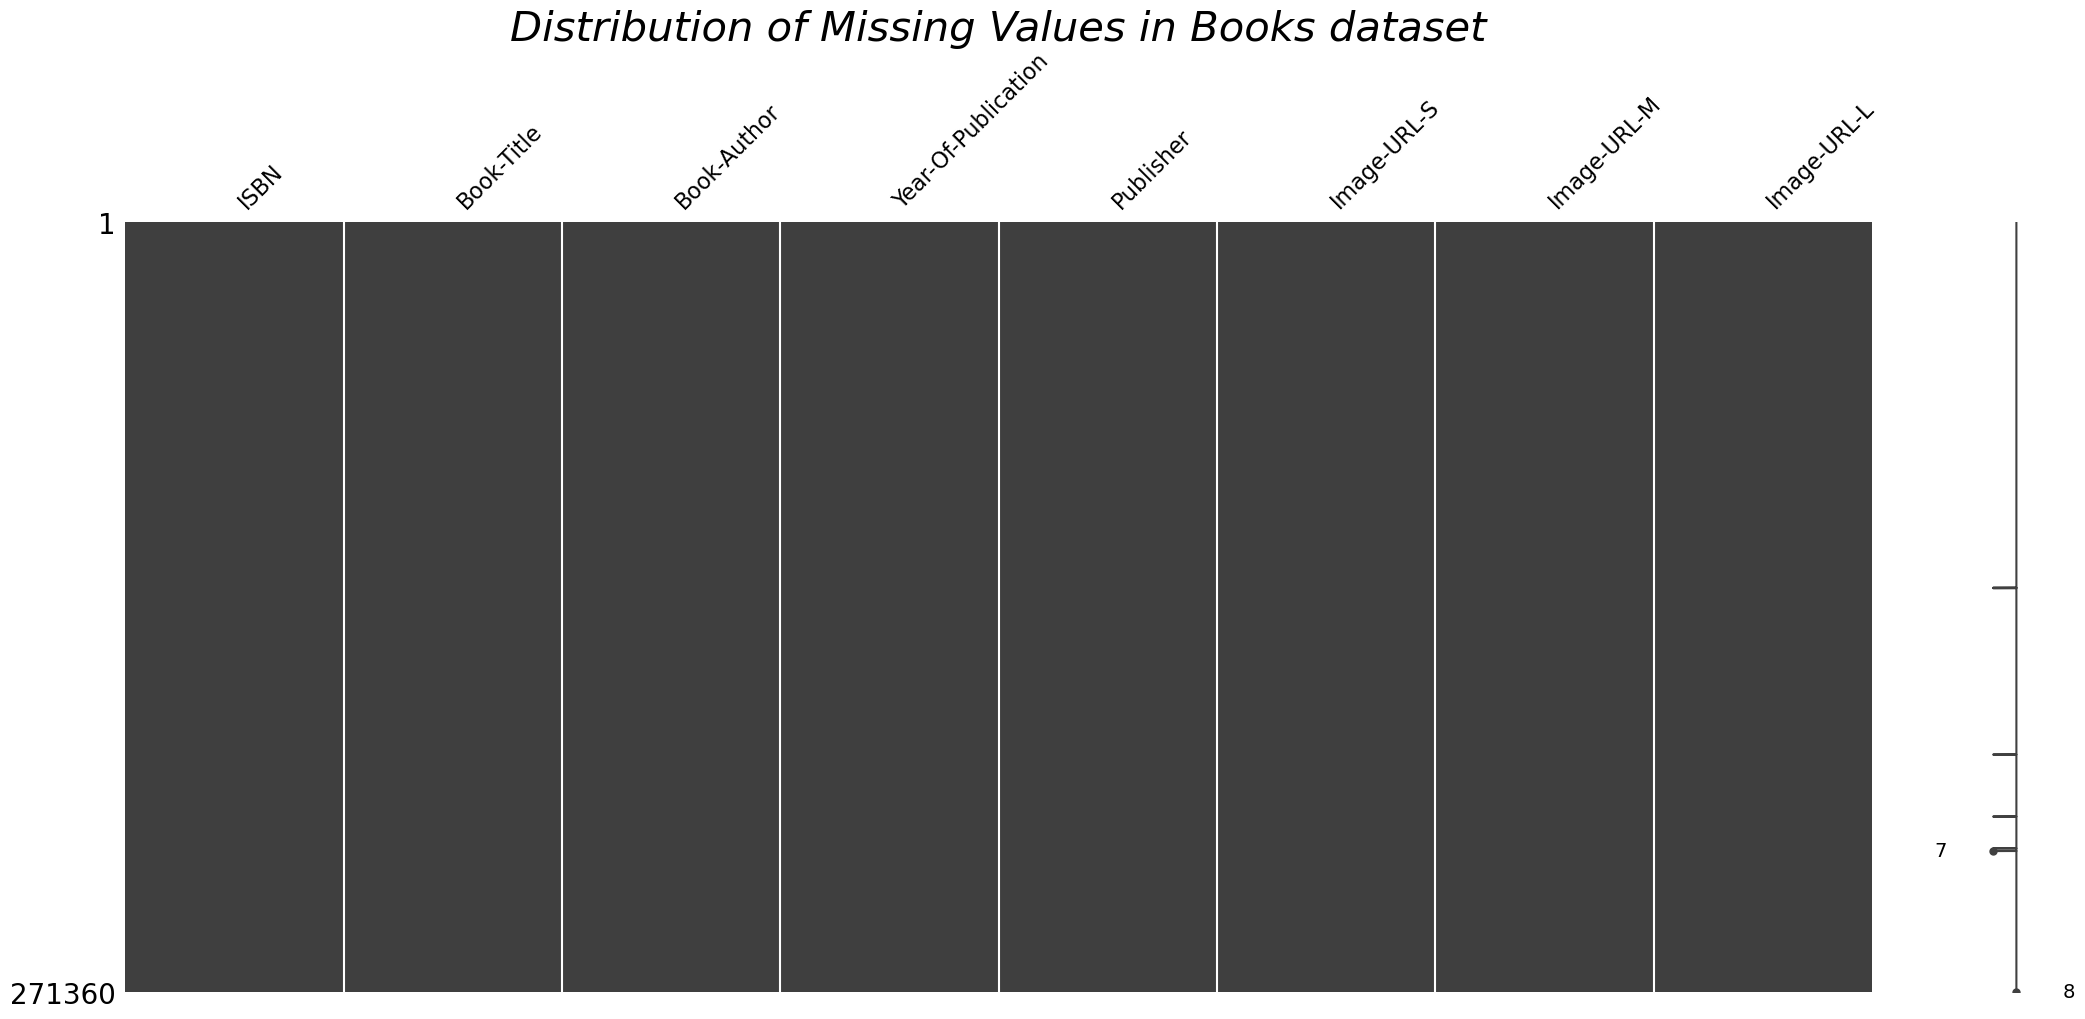

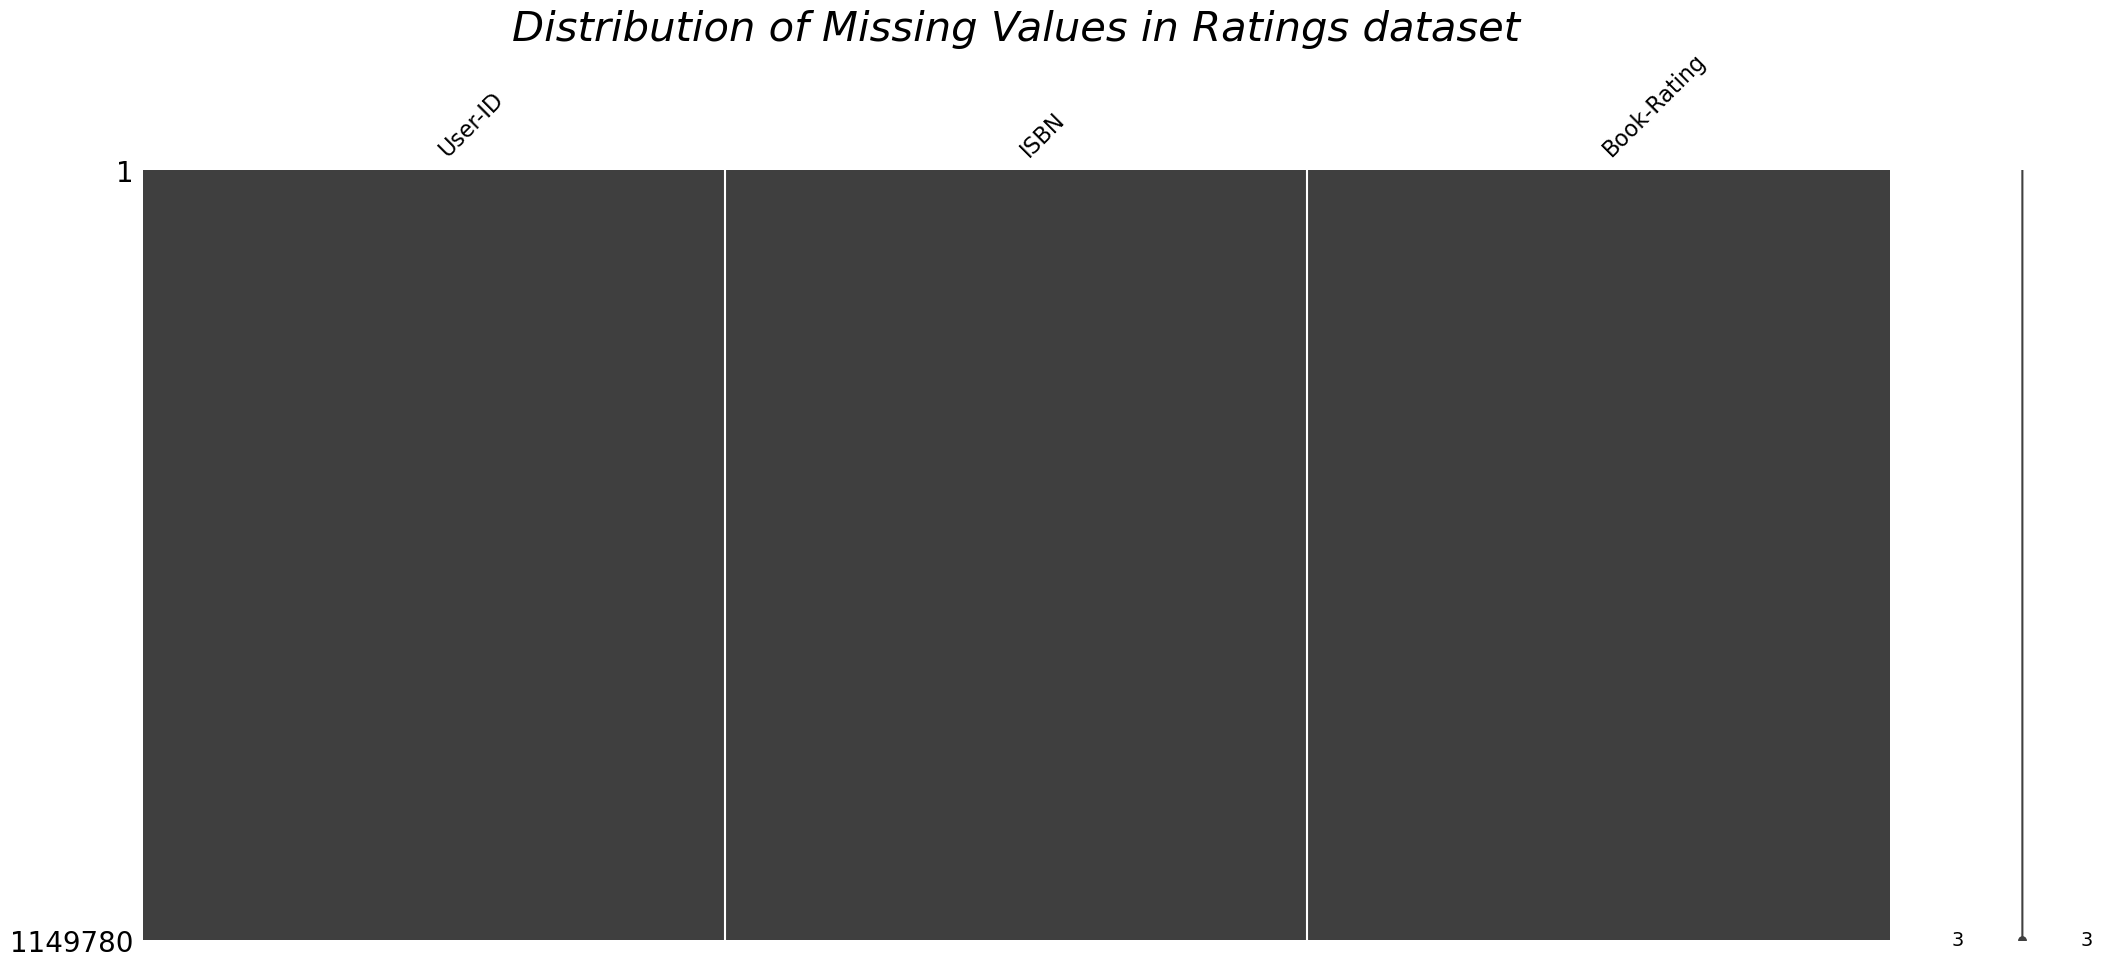

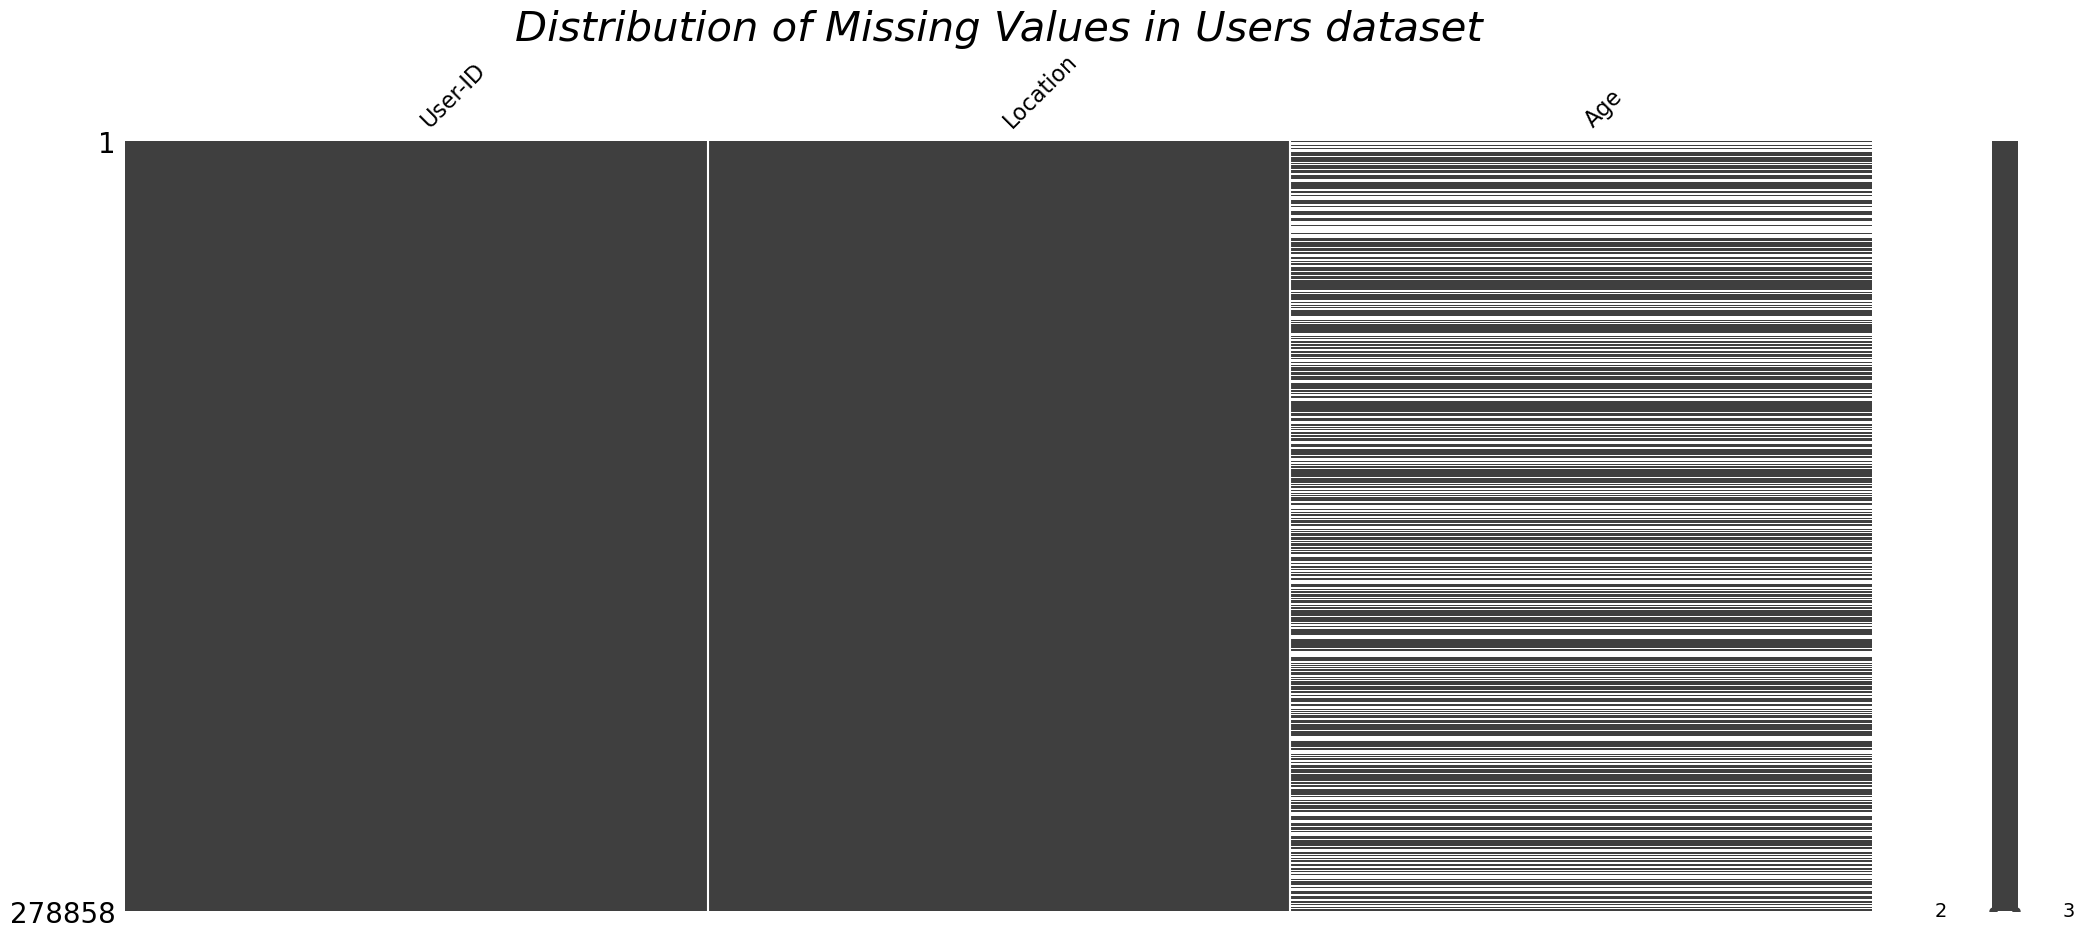

In [49]:
plot_missing_values(books, "Books")
plot_missing_values(ratings, "Ratings")
plot_missing_values(users, "Users")

This code defines a function plot_miss_vals that takes a dataframe and a string as input, and plots the distribution of missing values in the given dataframe using the msno.matrix function from the missingno library.

The function is then called three times to plot the distribution of missing values in the books, ratings, and users dataframes.

Visualizing the distribution of missing values is useful in identifying patterns and trends of missing data in the dataset. This can help in determining the best strategies for handling the missing values, such as imputing or dropping them.



## Distribution of book ratings

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

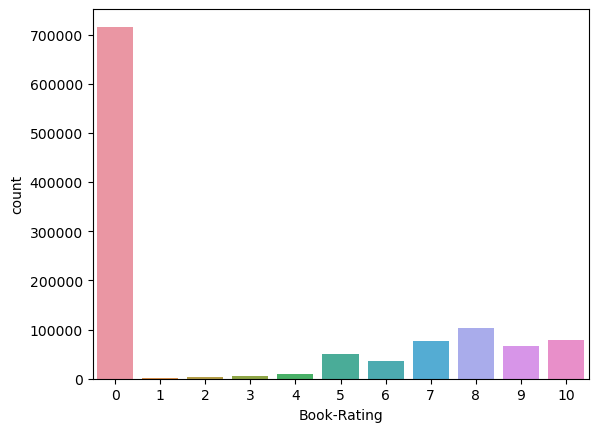

In [50]:
sns.countplot(x='Book-Rating', data=ratings_df)

This code will create a count plot showing the distribution of book ratings in the dataset. This could help identify if users are generally positive or negative in their ratings.

## Research questions

### Users who gave zero ratings

In [90]:
num_zero_ratings = len(ratings_df[ratings_df['Book-Rating'] == 0]['User-ID'].unique())
print("Number of users who gave a rating of 0:", num_zero_ratings)

Number of users who gave a rating of 0: 59517


### Display the top 10 publishers and book authors who has most books with 0 ratings

In [53]:
# Merge the books and ratings dataframes on the ISBN column
merged_df = books_df.merge(ratings_df, on='ISBN')

# Select only the books with a rating of 0
zero_ratings = merged_df[merged_df['Book-Rating'] == 0]

# Group the zero ratings by publisher and author, count the number of occurrences
publisher_counts = zero_ratings.groupby(['Publisher', 'Book-Author']).size().reset_index(name='Count')

# Sort the results by count in descending order
publisher_counts = publisher_counts.sort_values(by='Count', ascending=False)

# Display the top 10 publishers with the most books with 0 ratings
display(publisher_counts.head(10)[['Publisher', 'Book-Author', 'Count']])

,Publisher,Book-Author,Count
57531,Jove Books,Nora Roberts,2509
16455,Berkley Publishing Group,Tom Clancy,2336
100867,Signet Book,Stephen King,2029
113027,Too Far,Rich Shapero,1921
84387,Pocket,Mary Higgins Clark,1864
101691,Silhouette,Nora Roberts,1846
15715,Berkley Publishing Group,Dean R. Koontz,1741
84842,Pocket,V.C. Andrews,1719
97285,Scholastic,R. L. Stine,1555
25669,Dell,Danielle Steel,1345


### Most popular authors based on the number of books written

In [54]:
top_authors = books_df['Book-Author'].value_counts().nlargest(10)
print(top_authors)

Agatha Christie        598
William Shakespeare    559
Stephen King           511
Ann M. Martin          423
Carolyn Keene          372
Francine Pascal        372
Isaac Asimov           328
Nora Roberts           313
Barbara Cartland       307
Charles Dickens        295
Name: Book-Author, dtype: int64


This code will show the top 10 most popular authors in the dataset based on the number of books they have written. This could help identify if there are certain authors that are more popular among readers.

### Average rating by year of publication

In [84]:
merged_df = books_df.merge(ratings_df, on='ISBN')
avg_rating_by_year = merged_df.groupby('Year-Of-Publication')['Book-Rating'].mean()
print(avg_rating_by_year)

Year-Of-Publication
1376     4.000000
1378    10.000000
1806     5.000000
1897     0.000000
1900     1.750000
          ...    
2030     3.421053
2037    10.000000
2038     2.375000
2050     4.857143
1991     2.461538
Name: Book-Rating, Length: 116, dtype: float64


This code will calculate the average rating for books published in each year. This could help identify if there are certain years where books were generally rated higher or lower.

### Top 10 most rated books

In [56]:
# Group ratings by ISBN and count the number of ratings for each book
ratings_count = ratings['ISBN'].value_counts().rename('Book-Rating-Count')

# Merge the ratings_count Series with the books DataFrame on ISBN
books_with_count = pd.merge(books, ratings_count, left_on='ISBN', right_index=True)

# Sort the books by the rating count and retrieve the top 10 books
top_books = books_with_count.sort_values('Book-Rating-Count', ascending=False).head(10)

# Print the top 10 most rated books
print('Top 10 most rated books:')
print(top_books[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Book-Rating-Count']])

Top 10 most rated books:
                                             Book-Title     Book-Author  \
26                                          Wild Animus    Rich Shapero   
408                           The Lovely Bones: A Novel    Alice Sebold   
748                                   The Da Vinci Code       Dan Brown   
1105    Divine Secrets of the Ya-Ya Sisterhood: A Novel   Rebecca Wells   
522                 The Red Tent (Bestselling Backlist)   Anita Diamant   
305                                     A Painted House    John Grisham   
356                             The Secret Life of Bees   Sue Monk Kidd   
1922                             Snow Falling on Cedars  David Guterson   
118                                 Angels &amp; Demons       Dan Brown   
706   Where the Heart Is (Oprah's Book Club (Paperba...    Billie Letts   

     Year-Of-Publication  Book-Rating-Count  
26                  2004               2502  
408                 2002               1295  
748        

### Top 10 users who rated the most books

In [57]:
most_active_users = ratings.groupby('User-ID')['Book-Rating'].count().reset_index().sort_values('Book-Rating', ascending=False).head(10)
merged = pd.merge(most_active_users, users, on='User-ID')
print('Top 10 most active users:')
print(merged[['User-ID', 'Location', 'Age', 'Book-Rating']])

Top 10 most active users:
   User-ID                        Location   Age  Book-Rating
0    11676                   n/a, n/a, n/a   NaN        13602
1   198711   little canada, minnesota, usa  62.0         7550
2   153662       ft. stewart, georgia, usa  44.0         6109
3    98391            morrow, georgia, usa  52.0         5891
4    35859          duluth, minnesota, usa   NaN         5850
5   212898  la ronge, saskatchewan, canada   NaN         4785
6   278418            omaha, nebraska, usa   NaN         4533
7    76352        olympia, washington, usa  58.0         3367
8   110973  wiley ford, west virginia, usa  43.0         3100
9   235105         st louis, missouri, usa  46.0         3067


### Top 10 publishers based on number of books

In [61]:
top_publishers = books['Publisher'].value_counts().nlargest(10)
print('Top 10 publishers based on number of books:')
print(top_publishers)

Top 10 publishers based on number of books:
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: Publisher, dtype: int64


### Who are the most popular authors in the dataset?

In [62]:
# Merge the datasets on the ISBN column
merged_df = pd.merge(books, ratings, on='ISBN')

# Group the merged dataframe by author and count the number of ratings for each author
author_counts = merged_df.groupby('Book-Author')['Book-Rating'].count().reset_index()

# Sort the authors by the number of ratings in descending order
popular_authors = author_counts.sort_values('Book-Rating', ascending=False)

# Print the top 10 most popular authors
print(popular_authors.head(10))

              Book-Author  Book-Rating
90803        Stephen King        10053
73022        Nora Roberts         8429
48763        John Grisham         6010
42799     James Patterson         5845
66135  Mary Higgins Clark         4777
21432      Dean R. Koontz         4313
95761          Tom Clancy         4036
19266      Danielle Steel         3726
91816         Sue Grafton         3457
43814     Janet Evanovich         3350


### What is the average rating of books written by a particular author?

In [65]:
# Specify the author for which you want to calculate the average rating
author_name = 'J.K. Rowling'

# Create a new dataframe with the average rating for each book written by the specified author
author_ratings = merged_df[merged_df['Book-Author'] == author_name].groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Print the average rating of books written by the specified author
print(f"The average rating of books written by {author_name} is {author_ratings['Book-Rating'].mean()}")

The average rating of books written by J.K. Rowling is 4.472916666666666


### Is there a difference in ratings between fiction and non-fiction books?

In [66]:
# Merge the books and ratings dataframes on the ISBN column
merged_df = books.merge(ratings, on='ISBN')

# Create a new column called 'Genre' which categorizes books as fiction or non-fiction based on the book title
merged_df['Genre'] = merged_df['Book-Title'].apply(lambda x: 'Fiction' if 'fiction' in x.lower() else 'Non-Fiction')

# Calculate the average rating for each genre
avg_rating_df = merged_df.groupby('Genre')['Book-Rating'].mean().reset_index()

print(avg_rating_df)

         Genre  Book-Rating
0      Fiction     2.986352
1  Non-Fiction     2.838315


Fiction books have a slightly higher rating of (2.99) compared to non-fiction books (2.84).

### Is there a correlation between the publication year of a book and its average rating, and if so, how strong is this correlation?

In [68]:
# Merge the books and ratings dataframes
merged_df = books.merge(ratings, on='ISBN')

# Group the merged dataframe by publication year and calculate the average rating for each year
avg_rating_by_year = merged_df.groupby('Year-Of-Publication')['Book-Rating'].mean()

print(avg_rating_by_year)

Year-Of-Publication
0                     3.132611
1806                  5.000000
1900                  0.000000
1901                  4.571429
1902                  1.800000
                       ...    
2024                  0.000000
2030                  3.000000
2037                 10.000000
DK Publishing Inc     2.333333
Gallimard             0.000000
Name: Book-Rating, Length: 202, dtype: float64


This code calculates the average rating for books published in each year. This information can be useful in identifying trends in readership preferences over time. For example, it could reveal that books published in certain years consistently receive higher ratings, which could suggest that these books have stood the test of time and continue to be popular among readers. Additionally, this information could be used by publishers or authors to make decisions about which books to reprint or promote based on their past ratings success.

### Function-based programming technique

In [91]:
# Create a function that takes input as author name and return a table of books written by that author
def books_by_author(author):
    books_by_auth = books[books['Book-Author'] == author][['Book-Title', 'Year-Of-Publication', 'Publisher']]
    return books_by_auth

author_name = "Nora Roberts"
books_by_author(author_name)

,Book-Title,Year-Of-Publication,Publisher
368,Heart of the Sea (Irish Trilogy),2000,Jove Books
574,Brazen Virtue,1996,Bantam Books
580,Night Tales,2000,Silhouette
584,River's End,2003,Jove Books
783,The Villa,2001,Putnam Publishing Group
...,...,...,...
263244,Second Nature,1985,Silhouette
268834,Lessons Learned #25 (Nora Roberts : Language o...,1993,Silhouette
269950,Die Tochter des Magiers.,1998,Heyne
270032,Irish Rose # 3 (Language Of Love) (Language o...,1992,Silhouette


To use this function, you can assign the author's name to the author_name variable and call the books_by_author function with author_name as the argument. It will return a table of books written by that specified author, which contains the filtered and selected rows from the books dataset.

### Collaborative filtering for book recommender system

In [69]:
merge_ratings = ratings.merge(books,on='ISBN')

x = merge_ratings.groupby('User-ID').count()['Book-Rating'] > 300
active_users = x[x].index

filtered_rating = merge_ratings[merge_ratings['User-ID'].isin(active_users)]

y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

table = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

table.fillna(0,inplace=True)

table

User-ID,2276,3363,4385,6251,6543,6575,7158,7346,8681,8936,...,270713,271284,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Without Remorse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(table)
similarity_scores.shape

(477, 477)

In [71]:
def recommend(book_name):
    # index fetch
    index = np.where(table.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

This code is creating a pivot table where each row represents a book title and each column represents a user ID. 
The values in the pivot table represent the book ratings given by the respective user for the respective book. 
The pivot table is created by filtering out the users who have given less than 300 ratings and the books which have received less than 50 ratings. 
The missing values in the pivot table are then filled with zeros.

The first line filters the users who have rated at least 200 books and returns their User-ID.
The second line filters the ratings dataframe based on the User-ID filtered in the previous step and returns only those books which have been rated at least 50 times.
The third line creates a pivot table using the filtered ratings dataframe with 'Book-Title' as index, 'User-ID' as columns, and 'Book-Rating' as values.
The fourth line fills the NaN values in the pivot table with 0. This is done to make the matrix dense so that it can be used for further calculations.
The resulting pivot table contains the ratings for the most famous books, which can be used for further analysis such as collaborative filtering and building a recommendation system.

In [72]:
recommend('4 Blondes')

[['The House of the Spirits',
  'Isabel Allende',
  'http://images.amazon.com/images/P/0553273914.01.MZZZZZZZ.jpg'],
 ['Pride and Prejudice',
  'Jane Austen',
  'http://images.amazon.com/images/P/055321215X.01.MZZZZZZZ.jpg'],
 ['Here on Earth',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0425167313.01.MZZZZZZZ.jpg'],
 ['The God of Small Things',
  'Arundhati Roy',
  'http://images.amazon.com/images/P/0060977493.01.MZZZZZZZ.jpg']]

This will return a list of 4 books that are similar to "4 Blondes".

This is a function called "recommend" that takes a book name as an input parameter. It first finds the index of the input book in the "table" pivot table using the "np.where" method. Then, it calculates the similarity scores between the input book and all other books in the "table" pivot table using the "similarity_scores" array. It then sorts the similarity scores in descending order and retrieves the indices of the top 4 similar books using the "sorted" method and slicing.

The function then creates an empty list called "data" and iterates over the top 4 similar book indices. For each similar book, it retrieves its title, author, and image URL from the "books" dataframe and appends them to the "data" list. Finally, the function returns the "data" list containing the titles, authors, and image URLs of the top 4 similar books.


### popularity based recommender system

In [75]:
# Calculate the total number of ratings received by each book
ratings_count = ratings.groupby(['ISBN'])['Book-Rating'].count().reset_index().rename(columns={'Book-Rating': 'Rating-Count'})

# Merge the ratings count with the books dataframe
books_with_ratings = pd.merge(books, ratings_count, on='ISBN', how='left')

# Sort the books based on the number of ratings in descending order
sorted_books = books_with_ratings.sort_values('Rating-Count', ascending=False)

# Return the top-N books as the recommendations
def get_top_n_books(n):
    top_n_books = sorted_books.head(n)
    return top_n_books[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]


To build the popularity based recommender system:

Calculate the total number of ratings received by each book.
Sort the books based on the number of ratings in descending order.
Return the top-N books as the recommendations.

To use the above recommender system, simply call the get_top_n_books function and pass in the number of books we want as recommendations. For example, to get the top 10 recommended books, 

In [76]:
get_top_n_books(10)

,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,Wild Animus,Rich Shapero,2004,Too Far
408,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,The Da Vinci Code,Dan Brown,2003,Doubleday
1105,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
522,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
305,A Painted House,John Grisham,2001,Dell Publishing Company
356,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
1922,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
118,Angels &amp; Demons,Dan Brown,2001,Pocket Star
706,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books


# THE END